# Загрузка библиотек и датасета

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("../dags/data/data_from_db.csv", index_col=0)

data

,id,name,description,year,rating,votes,movie_length,age_rating,genres,countries
0,5921398,Гатчина. Молчание Сильвии,История 867 дней фашистской оккупации Гатчины ...,2024,8.639,272,-1,18,документальный|военный,Россия
1,5613191,Цвета зла: Красный,На пляже находят тело молодой девушки. Расслед...,2024,6.184,308,111,-1,триллер|драма|криминал|детектив,Польша
2,5461786,Самые опасные существа,Какое животное самое опасное для человека? Лев...,2021,8.733,1144,50,6,реальное ТВ,Германия
3,5581051,Без границ,Детектив Мёрк и его команда возобновляют нерас...,2024,5.884,157,121,-1,триллер|криминал,Дания
4,5516923,Мать невесты,Любящая мать прилетает на тропический остров н...,2024,5.424,413,88,-1,драма|мелодрама|комедия,США
...,...,...,...,...,...,...,...,...,...,...
795,684235,Собачий рай,Действие фильма происходит в Москве в 1953 год...,2013,4.828,1061,116,18,семейный,Россия
796,42495,Удар! Еще удар!,В основе сюжета - финальный матч по футболу в ...,1968,6.822,974,100,6,комедия|спорт,СССР
797,42289,Третья молодость,"Париж, середина XIX века. Молодой Мариус Петип...",1965,7.271,999,91,0,мелодрама,Франция|СССР
798,4725578,Растягивая время,"Истории людей, которые смогли победить рак.",2021,8.218,954,31,18,короткометражка|документальный,Россия


# EDA датасета

## Добавление признака - десятилетие

In [4]:
data["decade"] = data["year"].apply(lambda x: str(x // 10 * 10) + "-е")

data

,id,name,description,year,rating,votes,movie_length,age_rating,genres,countries,decade
0,5921398,Гатчина. Молчание Сильвии,История 867 дней фашистской оккупации Гатчины ...,2024,8.639,272,-1,18,документальный|военный,Россия,2020-е
1,5613191,Цвета зла: Красный,На пляже находят тело молодой девушки. Расслед...,2024,6.184,308,111,-1,триллер|драма|криминал|детектив,Польша,2020-е
2,5461786,Самые опасные существа,Какое животное самое опасное для человека? Лев...,2021,8.733,1144,50,6,реальное ТВ,Германия,2020-е
3,5581051,Без границ,Детектив Мёрк и его команда возобновляют нерас...,2024,5.884,157,121,-1,триллер|криминал,Дания,2020-е
4,5516923,Мать невесты,Любящая мать прилетает на тропический остров н...,2024,5.424,413,88,-1,драма|мелодрама|комедия,США,2020-е
...,...,...,...,...,...,...,...,...,...,...,...
795,684235,Собачий рай,Действие фильма происходит в Москве в 1953 год...,2013,4.828,1061,116,18,семейный,Россия,2010-е
796,42495,Удар! Еще удар!,В основе сюжета - финальный матч по футболу в ...,1968,6.822,974,100,6,комедия|спорт,СССР,1960-е
797,42289,Третья молодость,"Париж, середина XIX века. Молодой Мариус Петип...",1965,7.271,999,91,0,мелодрама,Франция|СССР,1960-е
798,4725578,Растягивая время,"Истории людей, которые смогли победить рак.",2021,8.218,954,31,18,короткометражка|документальный,Россия,2020-е


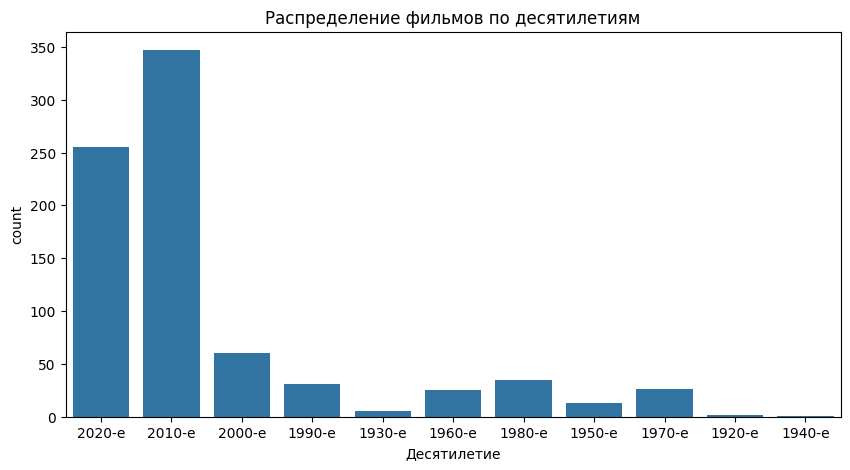

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="decade")
plt.title("Распределение фильмов по десятилетиям")
plt.xlabel("Десятилетие")
plt.show()

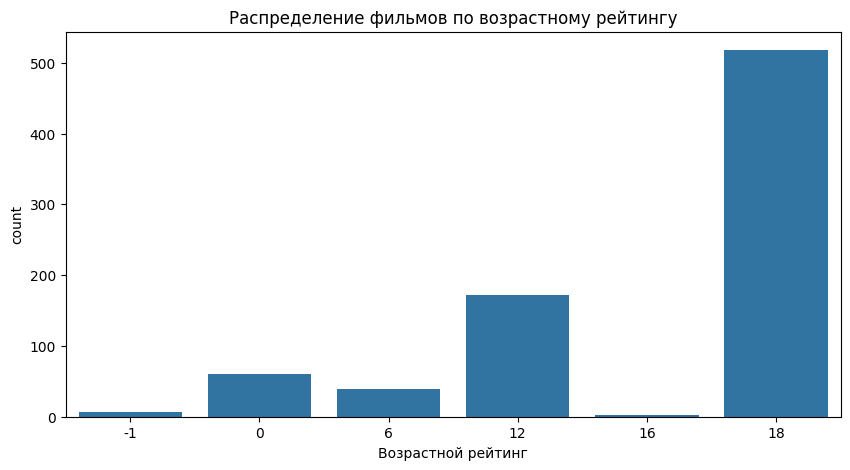

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="age_rating")
plt.title("Распределение фильмов по возрастному рейтингу")
plt.xlabel("Возрастной рейтинг")
plt.show()

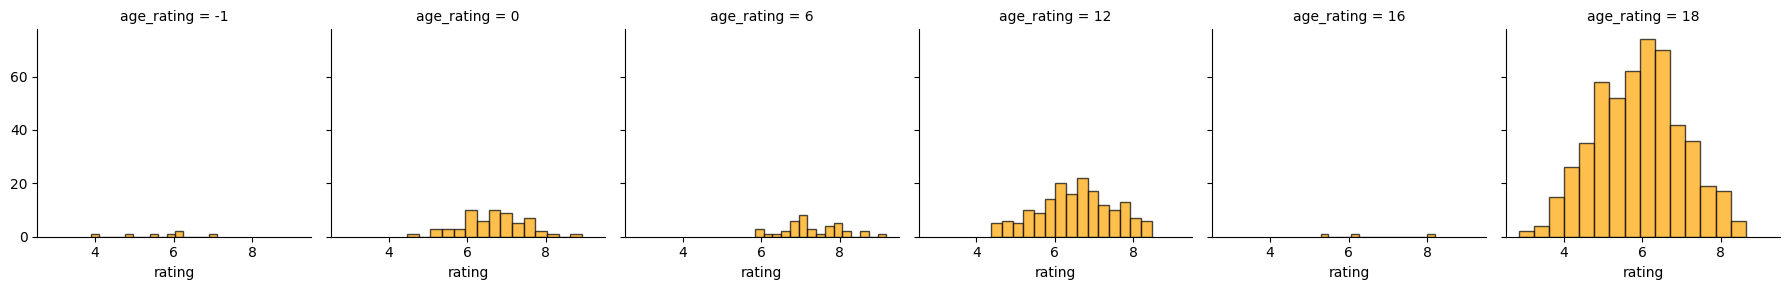

In [7]:
graph = sns.FacetGrid(data, col='age_rating') 
# map the above form facetgrid with some attributes 
graph.map(plt.hist, 'rating', bins=15, color='orange', edgecolor='black', alpha=0.7)
# show the object 
plt.show() 

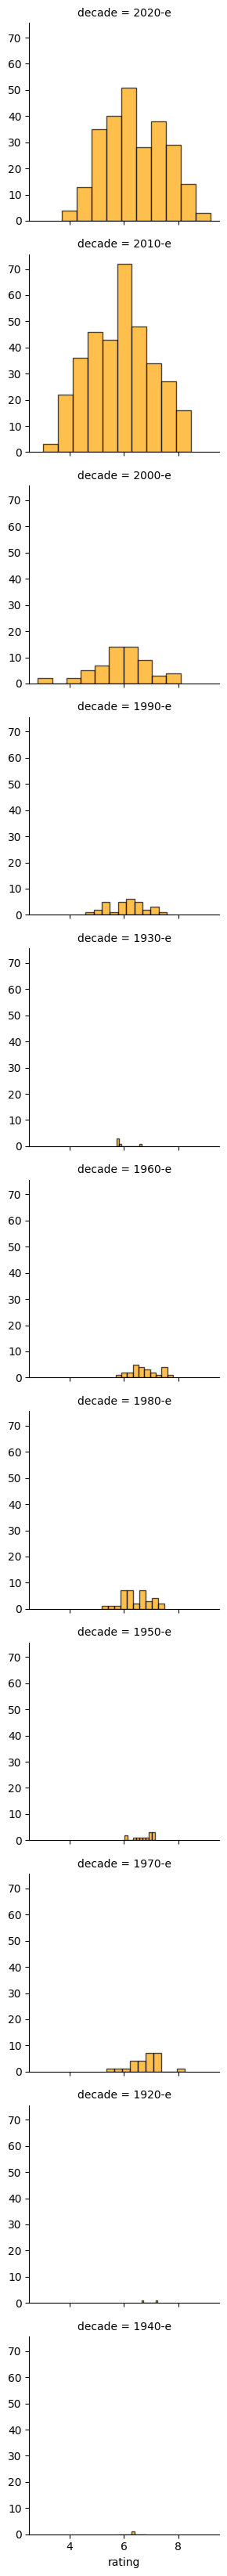

In [8]:
graph = sns.FacetGrid(data, row='decade') 
# map the above form facetgrid with some attributes 
graph.map(plt.hist, 'rating', bins=10, color='orange', edgecolor='black', alpha=0.7)
# show the object 
plt.show() 

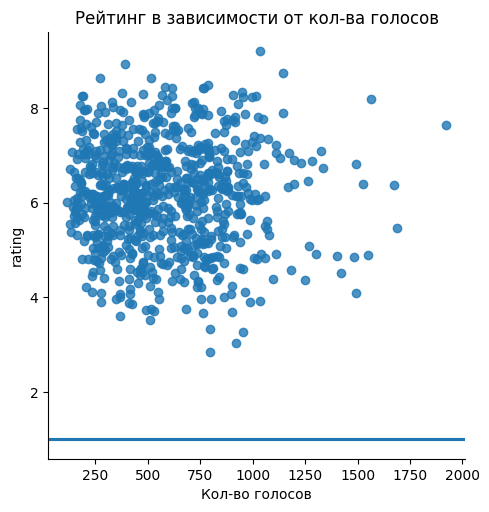

In [9]:
sns.lmplot(x="votes", y="rating", data=data[data["votes"] < 2000],
               palette="deep", logistic=True, truncate=False)
plt.title("Рейтинг в зависимости от кол-ва голосов")
plt.xlabel("Кол-во голосов")
plt.show()

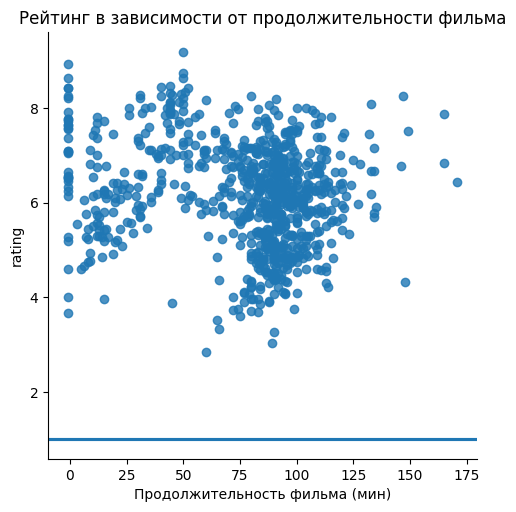

In [10]:
g = sns.lmplot(x="movie_length", y="rating", data=data,
               palette="deep", logistic=True, truncate=False)
plt.title("Рейтинг в зависимости от продолжительности фильма")
plt.xlabel("Продолжительность фильма (мин)")
plt.show()

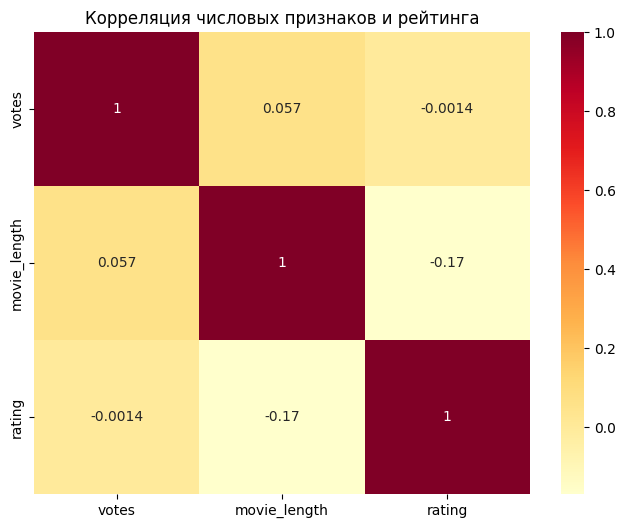

In [11]:
corr_matrix = data[["votes", "movie_length", "rating"]].corr(method='spearman')

# Создайте heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Корреляция числовых признаков и рейтинга')
plt.show()

## Преобразование жанров

In [12]:
data['genres'] = data['genres'].str.split('|')

In [13]:
data_genres = data.explode('genres')

data_genres

,id,name,description,year,rating,votes,movie_length,age_rating,genres,countries,decade
0,5921398,Гатчина. Молчание Сильвии,История 867 дней фашистской оккупации Гатчины ...,2024,8.639,272,-1,18,документальный,Россия,2020-е
0,5921398,Гатчина. Молчание Сильвии,История 867 дней фашистской оккупации Гатчины ...,2024,8.639,272,-1,18,военный,Россия,2020-е
1,5613191,Цвета зла: Красный,На пляже находят тело молодой девушки. Расслед...,2024,6.184,308,111,-1,триллер,Польша,2020-е
1,5613191,Цвета зла: Красный,На пляже находят тело молодой девушки. Расслед...,2024,6.184,308,111,-1,драма,Польша,2020-е
1,5613191,Цвета зла: Красный,На пляже находят тело молодой девушки. Расслед...,2024,6.184,308,111,-1,криминал,Польша,2020-е
...,...,...,...,...,...,...,...,...,...,...,...
796,42495,Удар! Еще удар!,В основе сюжета - финальный матч по футболу в ...,1968,6.822,974,100,6,спорт,СССР,1960-е
797,42289,Третья молодость,"Париж, середина XIX века. Молодой Мариус Петип...",1965,7.271,999,91,0,мелодрама,Франция|СССР,1960-е
798,4725578,Растягивая время,"Истории людей, которые смогли победить рак.",2021,8.218,954,31,18,короткометражка,Россия,2020-е
798,4725578,Растягивая время,"Истории людей, которые смогли победить рак.",2021,8.218,954,31,18,документальный,Россия,2020-е


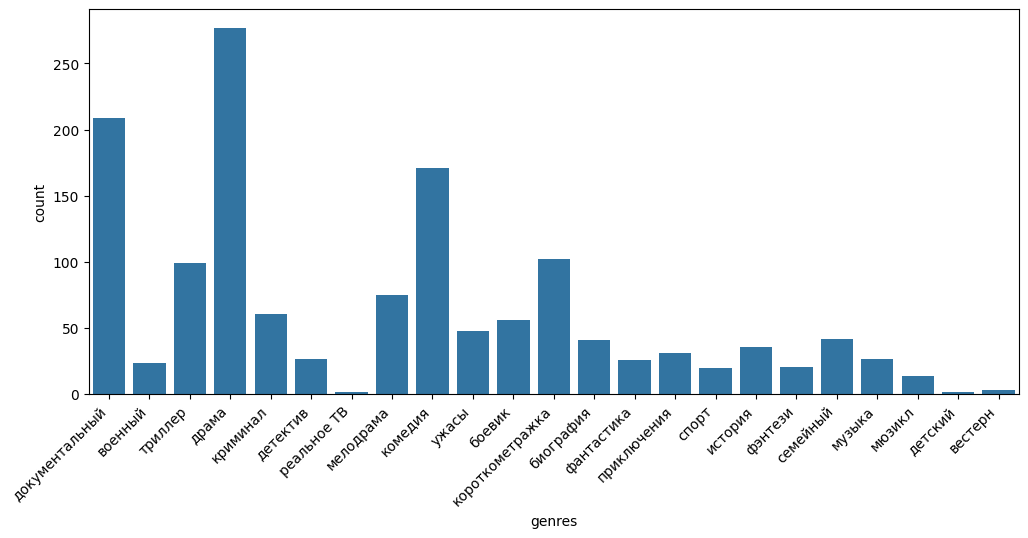

In [14]:
plt.figure(figsize=(12, 5))
sns.countplot(data=data_genres, x="genres")
plt.xticks(rotation=45, ha='right')
plt.show()

## Преобразование стран

In [15]:
data['countries'] = data['countries'].str.split('|')

In [16]:
data_countries = data.explode("countries")

data_countries

,id,name,description,year,rating,votes,movie_length,age_rating,genres,countries,decade
0,5921398,Гатчина. Молчание Сильвии,История 867 дней фашистской оккупации Гатчины ...,2024,8.639,272,-1,18,"[документальный, военный]",Россия,2020-е
1,5613191,Цвета зла: Красный,На пляже находят тело молодой девушки. Расслед...,2024,6.184,308,111,-1,"[триллер, драма, криминал, детектив]",Польша,2020-е
2,5461786,Самые опасные существа,Какое животное самое опасное для человека? Лев...,2021,8.733,1144,50,6,[реальное ТВ],Германия,2020-е
3,5581051,Без границ,Детектив Мёрк и его команда возобновляют нерас...,2024,5.884,157,121,-1,"[триллер, криминал]",Дания,2020-е
4,5516923,Мать невесты,Любящая мать прилетает на тропический остров н...,2024,5.424,413,88,-1,"[драма, мелодрама, комедия]",США,2020-е
...,...,...,...,...,...,...,...,...,...,...,...
796,42495,Удар! Еще удар!,В основе сюжета - финальный матч по футболу в ...,1968,6.822,974,100,6,"[комедия, спорт]",СССР,1960-е
797,42289,Третья молодость,"Париж, середина XIX века. Молодой Мариус Петип...",1965,7.271,999,91,0,[мелодрама],Франция,1960-е
797,42289,Третья молодость,"Париж, середина XIX века. Молодой Мариус Петип...",1965,7.271,999,91,0,[мелодрама],СССР,1960-е
798,4725578,Растягивая время,"Истории людей, которые смогли победить рак.",2021,8.218,954,31,18,"[короткометражка, документальный]",Россия,2020-е


In [17]:
data_countries['countries'].value_counts()

США               259
Россия            228
СССР              105
Франция            40
Великобритания     35
                 ... 
Исландия            1
Коста-Рика          1
Чили                1
Алжир               1
Колумбия            1
Name: countries, Length: 66, dtype: int64

In [18]:
data_countries.groupby(by='countries')['rating'].mean().sort_values(ascending=False)

countries
Коста-Рика        7.614000
Исландия          7.614000
Турция            7.228000
Германия (ГДР)    7.150000
Кыргызстан        7.056500
                    ...   
Болгария          5.330000
Чили              5.299000
Колумбия          4.911000
Украина           4.798667
Кипр              4.589000
Name: rating, Length: 66, dtype: float64

In [19]:
data_genres.groupby(by='genres')['rating'].mean().sort_values(ascending=False)

genres
реальное ТВ        8.962000
документальный     7.204072
биография          6.984390
история            6.888917
музыка             6.787963
спорт              6.562550
военный            6.519833
мюзикл             6.429286
семейный           6.329643
короткометражка    6.217206
драма              6.027531
детский            6.015500
мелодрама          5.927680
комедия            5.824152
фэнтези            5.808476
приключения        5.783452
криминал           5.627869
детектив           5.316926
боевик             5.122607
триллер            5.068667
вестерн            4.756667
фантастика         4.469308
ужасы              4.462854
Name: rating, dtype: float64

# Промежуточные выводы

1. Больше всего фильмов из 2010-ых и 2020-ых
2. Рейтинг фильма 18+ встречается гораздо чаще остальных
3. Самые популярные жанры: драма, документальный, комедия
4. Страны-лидеры по производству фильмов: США, Россия
5. Распределение рейтинга скошено вправо (означает, что люди предпочитают ставить оценки выше среднего)
6. Рейтинг сильно зависит от страны производства и жанров
7. Не удалось найти явную корреляцию рейтинга с числовыми признаками

# Преобразование признаков

## Пропущенные значения

### Визуализация пропусков

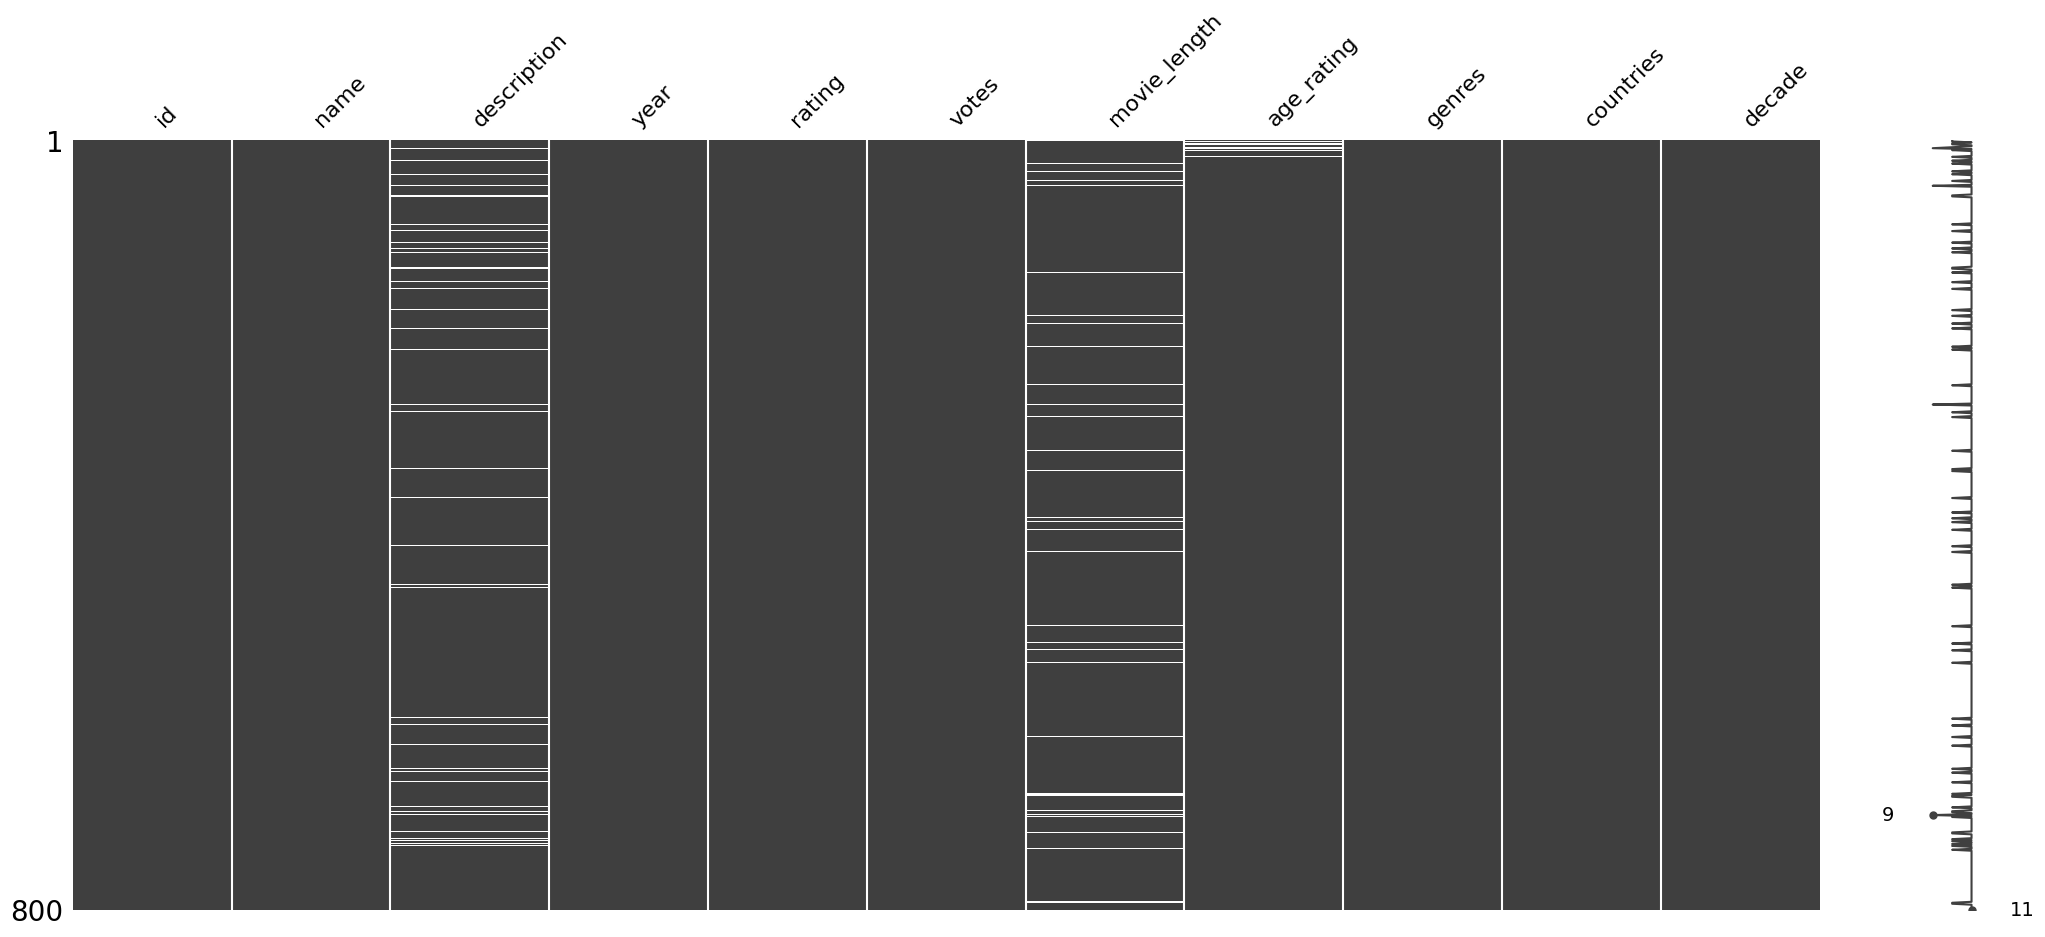

In [20]:
import missingno as msno


data = data.replace(-1, np.NaN)

msno.matrix(data)
plt.show()

In [21]:
data

,id,name,description,year,rating,votes,movie_length,age_rating,genres,countries,decade
0,5921398,Гатчина. Молчание Сильвии,История 867 дней фашистской оккупации Гатчины ...,2024,8.639,272,NaN,18.0,"[документальный, военный]",[Россия],2020-е
1,5613191,Цвета зла: Красный,На пляже находят тело молодой девушки. Расслед...,2024,6.184,308,111.0,NaN,"[триллер, драма, криминал, детектив]",[Польша],2020-е
2,5461786,Самые опасные существа,Какое животное самое опасное для человека? Лев...,2021,8.733,1144,50.0,6.0,[реальное ТВ],[Германия],2020-е
3,5581051,Без границ,Детектив Мёрк и его команда возобновляют нерас...,2024,5.884,157,121.0,NaN,"[триллер, криминал]",[Дания],2020-е
4,5516923,Мать невесты,Любящая мать прилетает на тропический остров н...,2024,5.424,413,88.0,NaN,"[драма, мелодрама, комедия]",[США],2020-е
...,...,...,...,...,...,...,...,...,...,...,...
795,684235,Собачий рай,Действие фильма происходит в Москве в 1953 год...,2013,4.828,1061,116.0,18.0,[семейный],[Россия],2010-е
796,42495,Удар! Еще удар!,В основе сюжета - финальный матч по футболу в ...,1968,6.822,974,100.0,6.0,"[комедия, спорт]",[СССР],1960-е
797,42289,Третья молодость,"Париж, середина XIX века. Молодой Мариус Петип...",1965,7.271,999,91.0,0.0,[мелодрама],"[Франция, СССР]",1960-е
798,4725578,Растягивая время,"Истории людей, которые смогли победить рак.",2021,8.218,954,31.0,18.0,"[короткометражка, документальный]",[Россия],2020-е


In [22]:
data[np.isnan(data['age_rating'])].shape[0]

7

In [23]:
data[np.isnan(data['movie_length'])].shape[0]

33

### Удаление строк с пропущенным age_rating

In [24]:
data = data[~np.isnan(data["age_rating"])]

data[np.isnan(data['age_rating'])].shape[0]

0

### Замена пропущенных movie_length на среднее значение

In [25]:
mean_movie_length = int(data["movie_length"].mean())

print("Средняя продолжительность фильма (в мин): ", mean_movie_length)

Средняя продолжительность фильма (в мин):  79


In [26]:
data["movie_length"] = data["movie_length"].fillna(mean_movie_length)

data[np.isnan(data['movie_length'])].shape[0]

0

### Замена пропущенных description на пустую строку

In [27]:
data[pd.isna(data["description"])]

,id,name,description,year,rating,votes,movie_length,age_rating,genres,countries,decade
21,1391451,Женская месть,NaN,2020,6.349,153,88.0,18.0,[комедия],[Чехия],2020-е
35,5423768,Империя,NaN,2023,5.750,185,93.0,18.0,"[драма, комедия, история]","[Дания, Испания, Швеция]",2020-е
47,4745070,И много любви,NaN,2021,6.571,262,79.0,18.0,"[мелодрама, комедия]",[Словакия],2020-е
57,841240,Никсон о Никсоне,NaN,2014,7.058,137,71.0,18.0,[документальный],[США],2010-е
58,4739518,Музыкальная шкатулка. Мистер Субботний вечер,NaN,2021,7.034,197,83.0,18.0,[документальный],[США],2020-е
87,1113449,Полет Конкордов. Концерт в Лондоне,NaN,2018,8.065,177,88.0,18.0,"[комедия, музыка]",[США],2010-е
94,808456,"Pulp: фильм о жизни, смерти и супермаркетах",NaN,2014,7.951,195,90.0,18.0,"[документальный, музыка]",[Великобритания],2010-е
106,727921,Теория разрыва,NaN,2015,4.807,214,87.0,18.0,"[триллер, драма, детектив]",[США],2010-е
112,935896,Сан-Франциско 2.0,NaN,2015,6.949,201,39.0,18.0,[документальный],[США],2010-е
116,699788,Закусочная кровососов,NaN,2012,5.100,288,75.0,18.0,"[ужасы, комедия]",[Канада],2010-е


In [28]:
data["description"] = data["description"].fillna("")

data[pd.isna(data["description"])]

,id,name,description,year,rating,votes,movie_length,age_rating,genres,countries,decade


## Преобразование категориальных признаков в бинарные

### Преобразование genres

In [29]:
unique_genres = data_genres["genres"].unique()

unique_genres

array(['документальный', 'военный', 'триллер', 'драма', 'криминал',
       'детектив', 'реальное ТВ', 'мелодрама', 'комедия', 'ужасы',
       'боевик', 'короткометражка', 'биография', 'фантастика',
       'приключения', 'спорт', 'история', 'фэнтези', 'семейный', 'музыка',
       'мюзикл', 'детский', 'вестерн'], dtype=object)

In [30]:
def get_binary_genre(genre: str):
    data.loc[:, genre] = data["genres"].apply(lambda x: 1 if genre in x else 0)
    print("Добавлен жанр: ", genre)


for genre in unique_genres:
    get_binary_genre(genre)

Добавлен жанр:  документальный
Добавлен жанр:  военный
Добавлен жанр:  триллер
Добавлен жанр:  драма
Добавлен жанр:  криминал
Добавлен жанр:  детектив
Добавлен жанр:  реальное ТВ
Добавлен жанр:  мелодрама
Добавлен жанр:  комедия
Добавлен жанр:  ужасы
Добавлен жанр:  боевик
Добавлен жанр:  короткометражка
Добавлен жанр:  биография
Добавлен жанр:  фантастика
Добавлен жанр:  приключения
Добавлен жанр:  спорт
Добавлен жанр:  история
Добавлен жанр:  фэнтези
Добавлен жанр:  семейный
Добавлен жанр:  музыка
Добавлен жанр:  мюзикл
Добавлен жанр:  детский
Добавлен жанр:  вестерн


### Преобразование countries

In [31]:
unique_countries = data_countries["countries"].unique()

unique_countries

array(['Россия', 'Польша', 'Германия', 'Дания', 'США', 'Испания',
       'Канада', 'Франция', 'Турция', 'Казахстан', 'Кыргызстан',
       'Новая Зеландия', 'Австралия', 'ОАЭ', 'Чехия', 'Нидерланды', 'ЮАР',
       'Швеция', 'Словакия', 'Филиппины', 'Италия', 'Бельгия',
       'Великобритания', 'Корея Южная', 'Аргентина', 'Мальта', 'СССР',
       '-1', 'Португалия', 'Израиль', 'Бразилия', 'Уругвай', 'Ирландия',
       'Грузия', 'Греция', 'Япония', 'Швейцария', 'Словения', 'Хорватия',
       'Латвия', 'Австрия', 'Чили', 'Китай', 'Беларусь', 'Индия', 'Алжир',
       'Мексика', 'Коста-Рика', 'Исландия', 'Норвегия', 'Украина',
       'Гонконг', 'Венгрия', 'Таиланд', 'Ливан', 'Болгария', 'Доминикана',
       'Эстония', 'Сербия', 'Чехословакия', 'Германия (ГДР)', 'Кипр',
       'Тайвань', 'Люксембург', 'Румыния', 'Колумбия'], dtype=object)

In [32]:
mode_country = data_countries["countries"].mode()[0] # для замены -1 на моду признака

data["countries"] = data["countries"].apply(lambda x: [mode_country] if "-1" in x else x)

In [33]:
unique_countries = unique_countries[unique_countries != "-1"]

In [34]:
def get_binary_genre(country: str):
    data.loc[:, country] = data["countries"].apply(lambda x: 1 if genre in x else 0)
    print("Добавлена страна: ", country)


for country in unique_countries:
    get_binary_genre(country)

Добавлена страна:  Россия
Добавлена страна:  Польша
Добавлена страна:  Германия
Добавлена страна:  Дания
Добавлена страна:  США
Добавлена страна:  Испания
Добавлена страна:  Канада
Добавлена страна:  Франция
Добавлена страна:  Турция
Добавлена страна:  Казахстан
Добавлена страна:  Кыргызстан
Добавлена страна:  Новая Зеландия
Добавлена страна:  Австралия
Добавлена страна:  ОАЭ
Добавлена страна:  Чехия
Добавлена страна:  Нидерланды
Добавлена страна:  ЮАР
Добавлена страна:  Швеция
Добавлена страна:  Словакия
Добавлена страна:  Филиппины
Добавлена страна:  Италия
Добавлена страна:  Бельгия
Добавлена страна:  Великобритания
Добавлена страна:  Корея Южная
Добавлена страна:  Аргентина
Добавлена страна:  Мальта
Добавлена страна:  СССР
Добавлена страна:  Португалия
Добавлена страна:  Израиль
Добавлена страна:  Бразилия
Добавлена страна:  Уругвай
Добавлена страна:  Ирландия
Добавлена страна:  Грузия
Добавлена страна:  Греция
Добавлена страна:  Япония
Добавлена страна:  Швейцария
Добавлена страна

# Обучение модели (только числовые признаки)

## Разделение на X и Y

In [35]:
from sklearn.model_selection import train_test_split


X = data[["votes", "movie_length"]]

y = data["rating"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Обучение модели RandomForestRegressor

In [36]:
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor(random_state=42)

rfr.fit(x_train, y_train)

y_pred = rfr.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print("RMSE: ", rmse)
print("MAE: ", mae)

RMSE:  1.1583482473029105
MAE:  0.950494073375262


## Обучение модели с GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV


rfr = RandomForestRegressor()

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[2, 3, 5],
              'min_samples_split':[2, 3, 5]
            }

grid = GridSearchCV(rfr, param_grid=grid_space, cv=3, n_jobs=-1, 
                    scoring="neg_mean_squared_error", error_score='raise')
model_grid = grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Scoring:", grid.best_score_)

best_model = grid.best_estimator_

Best Parameters: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 10}
Best Scoring: -1.071260070553981


In [39]:
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print("RMSE: ", rmse)
print("MAE: ", mae)

RMSE:  1.0507354528545154
MAE:  0.8678759352401765


# Обучение модели с доп. признаками: decade, age_rating

## Преобразование признаков через LabelEncoder

In [40]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

decade_list = sorted(data["decade"].unique())

le.fit(decade_list)

data["decade_transformed"] = le.transform(data["decade"])

In [41]:
le = LabelEncoder()

age_rating_list = sorted(data["age_rating"].unique())

le.fit(age_rating_list)

data["age_rating_transformed"] = le.transform(data["age_rating"])

## Разделение на X и Y

In [42]:
X = data[["votes", "movie_length", "decade_transformed", "age_rating_transformed"]]

y = data["rating"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Обучение модели с GridSearchCV

In [43]:
rfr = RandomForestRegressor(random_state=42)

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[2, 3, 5],
              'min_samples_split':[2, 3, 5]
            }

grid = GridSearchCV(rfr, param_grid=grid_space, cv=3, n_jobs=-1, 
                    scoring="neg_mean_squared_error", error_score='raise')
model_grid = grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Scoring:", grid.best_score_)

best_model = grid.best_estimator_

Best Parameters: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Scoring: -0.8990192078590912


In [44]:
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print("RMSE: ", rmse)
print("MAE: ", mae)

RMSE:  0.9533288268031641
MAE:  0.7775865746486096


# Обучение модели со всеми признаками

## Разделение на X и Y

In [45]:
X_cols = ["votes", "movie_length", "decade_transformed", "age_rating_transformed"]

X_cols.extend(unique_genres.tolist())
X_cols.extend(unique_countries.tolist())

In [46]:
X = data[X_cols]

y = data["rating"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Обучение модели с GridSearchCV

In [47]:
rfr = RandomForestRegressor(random_state=42)

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[2, 3, 5],
              'min_samples_split':[2, 3, 5]
            }

grid = GridSearchCV(rfr, param_grid=grid_space, cv=3, n_jobs=-1, 
                    scoring="neg_mean_squared_error", error_score='raise')
model_grid = grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Scoring:", grid.best_score_)

best_model = grid.best_estimator_

Best Parameters: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Scoring: -0.6145153917508752


In [48]:
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print("RMSE: ", rmse)
print("MAE: ", mae)

RMSE:  0.7281649228065967
MAE:  0.5851145347282208


# Обучение модели с использованием PCA

## Нормализация votes и movie_length

In [49]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[["votes", "movie_length"]])

## Разделение на X и Y

In [50]:
X_cols.remove("votes")
X_cols.remove("movie_length")

X = np.hstack((X_scaled, data[X_cols].values))

## Преобразование через PCA

### Обучение PCA

In [51]:
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(X)

PCA()

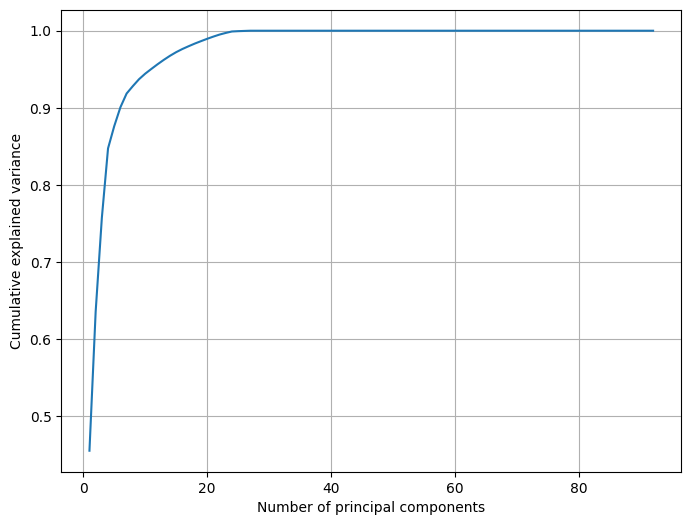

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

### Выбор лучшего числа компонент

In [53]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum >= 0.95) + 1

d

11

### Обучение и преобразование с лучшим количеством компонент

In [54]:
pca = PCA(n_components=d)

X_pca = pca.fit_transform(X)

## Разделение на X и Y

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

## Обучение модели с GridSearchCV

In [56]:
rfr = RandomForestRegressor(random_state=42)

grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[2, 3, 5],
              'min_samples_split':[2, 3, 5]
            }

grid = GridSearchCV(rfr, param_grid=grid_space, cv=3, n_jobs=-1, 
                    scoring="neg_mean_squared_error", error_score='raise')
model_grid = grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Scoring:", grid.best_score_)

best_model = grid.best_estimator_

Best Parameters: {'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Best Scoring: -0.5638044835466928


In [57]:
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print("RMSE: ", rmse)
print("MAE: ", mae)

RMSE:  0.679180874453107
MAE:  0.5445454227063377


# Вывод

Спустя множество попыток обучения модели и преобразований признаков был достигнут результат: RMSE=0.67, что является очень хорошим результатом. Модель будет более стабильна, если добавить ещё данных (чем и занимается DAG: ETL). Теперь лишь нужно добавить обучение в отдельный DAG.